# 01 - Taoyuan aoi

This notebook __uploads from local to database Taoyuan's (Taiwan) area of interest.__

The area of interest was previously created on GIS by dissolving the following counties (without their smaller islands):
* Keelung City
* Taipei City
* New Taipei City
* Hsinchu County
* Taoyuan City

__Areas of interest uploaded:__
* aoi_name = __'taoyuan_aoi'__ --> All previous counties dissolved.
* aoi_name = __'taoyuan_drawn_aoi'__ --> Smaller area drawn around urban area of all previous counties.
* aoi_name = __'taoyuan_cut_aoi'__ --> Just Taoyuan, intersected with the drawn_aoi (Which leaves the mountainous area out of the analysis)

## __Import libraries__

In [1]:
from pathlib import Path

current_path = Path().resolve()

for parent in current_path.parents:
    if parent.name == "accesibilidad-urbana":
        project_root = parent
        break

print(project_root)

/home/observatorio/Documents/repos/accesibilidad-urbana


In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join(project_root))
if module_path not in sys.path:
    print(f"Path found.")
    sys.path.append(module_path)
    import aup
else:
    print(f"Path already loaded.")
    import aup

repo_path = str(module_path)+"/"
print(f"Repo path: {repo_path}")

Path already loaded.
Repo path: /home/observatorio/Documents/repos/accesibilidad-urbana/


## __Notebook config__

In [11]:
# ----- ----- ----- Input configuration
project_path = repo_path + "data/projects/30_taojuan/"

# ----- ----- ----- Saving configuration
# save output to database?
save = False
save_schema = 'projects_research'
save_table = 'taoyuan_aoi'
if_exists='append'

## __Load administrative boundaries__

In [4]:
# Load previously created area of interest
aoi_gdf = gpd.read_file(project_path+"/area_of_interest/taoyuan_nomountains_drawnaoi.gpkg")
if aoi_gdf.crs != "EPSG:4326":
    aoi_gdf = aoi_gdf.to_crs("EPSG:4326")

# Simplify data
aoi_gdf['aoi_name'] = 'taoyuan_drawn_aoi'
#aoi_gdf.drop(columns=['COUNTYID','COUNTYCODE','COUNTYNAME','COUNTYENG'],inplace=True)

# Show
print(aoi_gdf.crs)
print(aoi_gdf.shape)
aoi_gdf.head(2)

EPSG:4326
(1, 2)


,geometry,aoi_name
0,"MULTIPOLYGON (((121.26668 25.12071, 121.26901 ...",taoyuan_drawn_aoi


<Axes: >

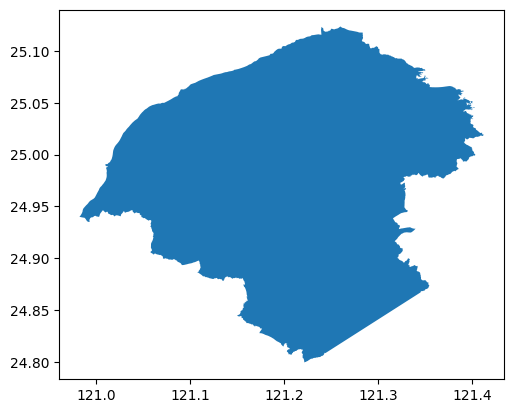

In [5]:
fig,ax = plt.subplots()
aoi_gdf.plot(ax=ax)

## __Upload to database__

In [12]:
if save:
    aup.gdf_to_db_slow(aoi_gdf, save_table, save_schema, if_exists=if_exists)